# This assignment is an individual work
- Author: Junru Lu(lj1230)

In [1]:
from __future__ import print_function
__author__= 'junru'

import numpy as np
# this package sets up for gaussian fitting
from scipy import stats
from scipy.optimize import curve_fit, minimize
# this package sets up pretty plots
import seaborn
import pylab as pl
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## choose which distributions to use 

In [2]:
distributions = ['chisq', 'lnorm', 'pois', 'binomial', 'expo']

## and which mean to give them

In [3]:
mymean = 100

In [4]:
# create a dictionary to hold all distributions
md = {}

# Numpy random sampling package
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



# I. Chi sq distribution

In [5]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [6]:
mysize = np.linspace(11, 1999, 100, dtype=int)
print(mysize, mysize.shape)

[  11   31   51   71   91  111  131  151  171  191  211  231  251  272  292
  312  332  352  372  392  412  432  452  472  492  513  533  553  573  593
  613  633  653  673  693  713  733  753  774  794  814  834  854  874  894
  914  934  954  974  994 1015 1035 1055 1075 1095 1115 1135 1155 1175 1195
 1215 1235 1256 1276 1296 1316 1336 1356 1376 1396 1416 1436 1456 1476 1496
 1517 1537 1557 1577 1597 1617 1637 1657 1677 1697 1717 1737 1758 1778 1798
 1818 1838 1858 1878 1898 1918 1938 1958 1978 1999] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


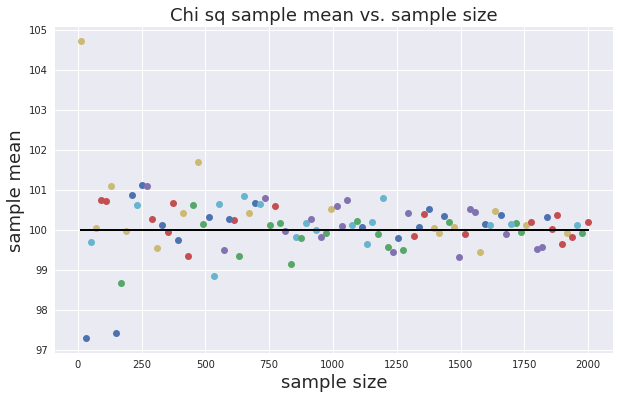

In [7]:
# nested dictionary
md['chisq'] = {} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size=n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()  # pairwisely save the means of all chi sq distributions
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi sq sample mean vs. sample size', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 1: This is the plot of the $Chi$ $sq$ sample mean (dependent var.) against the sample size N (independent var.). As the number of sample size increases, the sample mean (dependent var.) is approaching the theoretical value, which is given as $df=mymean=100$ at the beginning

## now the histogram of the mean of all chi sq samples

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

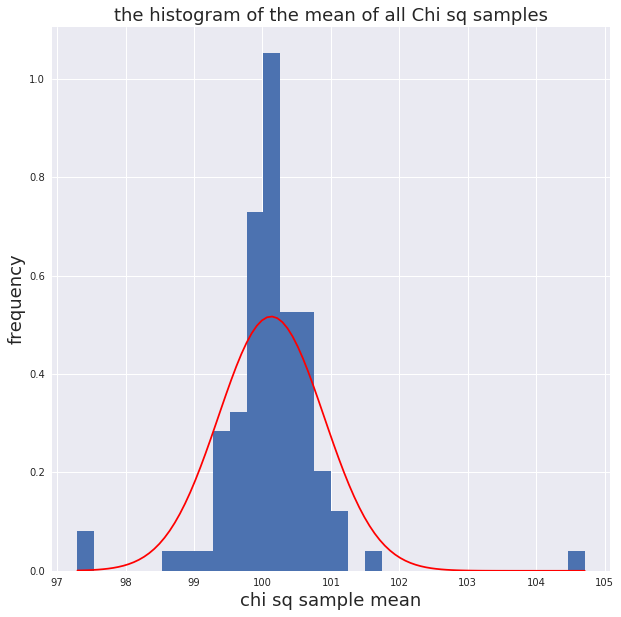

In [8]:
allmeans_chisq = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_chisq,bins=30,normed=True)
pl.xlabel('chi sq sample mean', fontsize = 18)
pl.ylabel('frequency', fontsize = 18)
pl.title('the histogram of the mean of all Chi sq samples', fontsize = 18)

# fit with gaussian distribution
xmin_chisq, xmax_chisq = min(allmeans_chisq), max(allmeans_chisq)
lnspc_chisq = np.linspace(xmin_chisq, xmax_chisq, len(allmeans_chisq))
m_chisq, s_chisq = stats.norm.fit(allmeans_chisq) # get mean and standard deviation
pdf_g_chisq = stats.norm.pdf(lnspc_chisq, m_chisq, s_chisq) # now get theoretical values in our interval
pl.plot(lnspc_chisq, pdf_g_chisq, label="Gaussian", color='r')

## Figure 2: This is the histogram of the mean of all Chi sq samples. It shows the distribution of the mean of all chi sq samples tends to a Gaussian

# II. Normal distribution

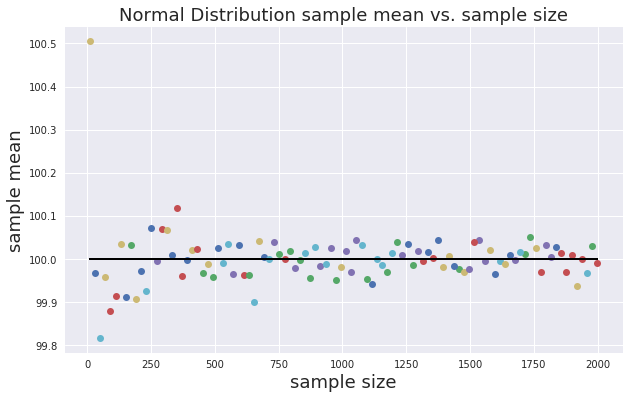

In [9]:
md['lnorm'] = {}
for n in mysize:
    md['lnorm'][n] = np.random.normal(mymean, size=n)
    
md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal Distribution sample mean vs. sample size', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 3: This is the plot of the $Normal$ $Distribution$ sample mean (dependent var.) against the sample size N (independent var.). As the number of sample size increases, the sample mean (dependent var.) is approaching the theoretical value, which is given as $mymean=100$ at the beginning

## now the histogram of the mean of all normal distribution samples

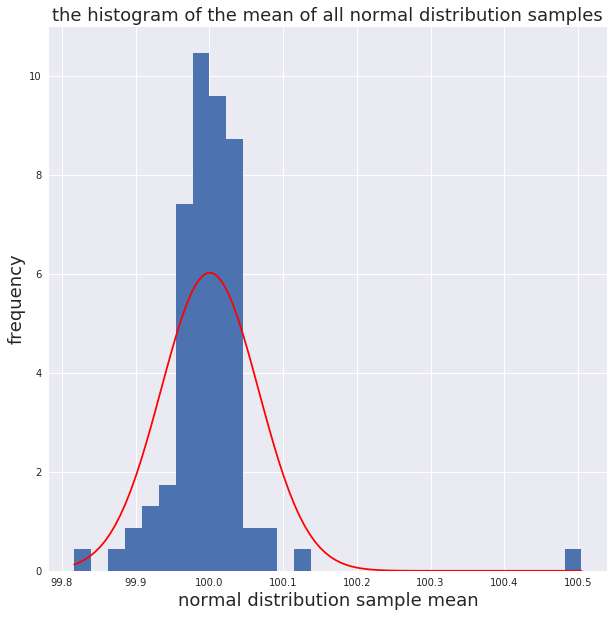

In [10]:
allmeans_norm = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_norm,bins=30,normed=True)
pl.xlabel('normal distribution sample mean', fontsize = 18)
pl.ylabel('frequency', fontsize = 18)
pl.title('the histogram of the mean of all normal distribution samples', fontsize = 18)

# fit with gaussian distribution
xmin_norm, xmax_norm = min(allmeans_norm), max(allmeans_norm)
lnspc_norm = np.linspace(xmin_norm, xmax_norm, len(allmeans_norm))
m_norm, s_norm = stats.norm.fit(allmeans_norm) # get mean and standard deviation
pdf_g_norm = stats.norm.pdf(lnspc_norm, m_norm, s_norm) # now get theoretical values in our interval
pl.plot(lnspc_norm, pdf_g_norm, label="Gaussian", color='r')

## Figure 4: This is the histogram of the mean of all Normal Distribution samples. It shows the distribution of the mean of all normal distribution samples tends to a Gaussian

# III. Poisson distribution

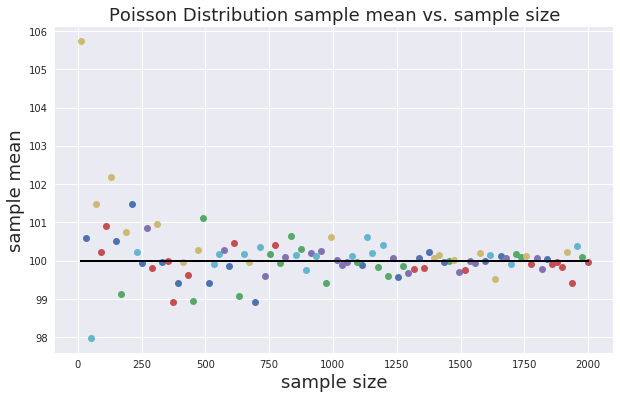

In [11]:
md['pois'] = {}
for n in mysize:
    md['pois'][n] = np.random.poisson(mymean, size=n)
    
md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson Distribution sample mean vs. sample size', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 5: This is the plot of the $Poisson$ $Distribution$ sample mean (dependent var.) against the sample size N (independent var.). As the number of sample size increases, the sample mean (dependent var.) is approaching the theoretical value, which is given as $lam=mymean=100$ at the beginning

## now the histogram of the mean of all poisson distribution samples

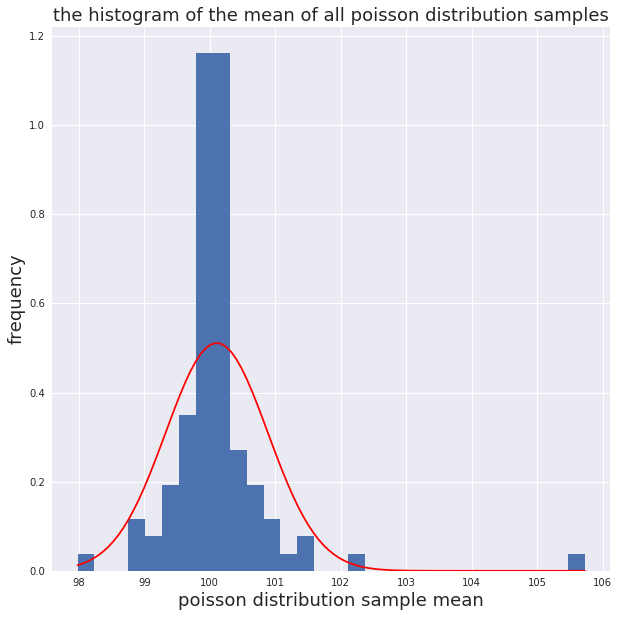

In [12]:
allmeans_pois = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois,bins=30,normed=True)
pl.xlabel('poisson distribution sample mean', fontsize = 18)
pl.ylabel('frequency', fontsize = 18)
pl.title('the histogram of the mean of all poisson distribution samples', fontsize = 18)

# fit with gaussian distribution
xmin_pois, xmax_pois = min(allmeans_pois), max(allmeans_pois)
lnspc_pois = np.linspace(xmin_pois, xmax_pois, len(allmeans_pois))
m_pois, s_pois = stats.norm.fit(allmeans_pois) # get mean and standard deviation
pdf_g_pois = stats.norm.pdf(lnspc_pois, m_pois, s_pois) # now get theoretical values in our interval
pl.plot(lnspc_pois, pdf_g_pois, label="Gaussian", color='r')

## Figure 6: This is the histogram of the mean of all Poisson Distribution samples. It shows the distribution of the mean of all normal distribution samples tends to a Gaussian

# IV. Binomial distribution

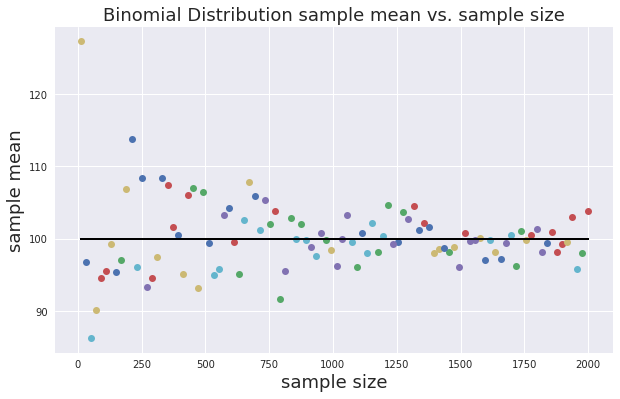

In [13]:
md['binom'] = {}
for n in mysize:
    md['binom'][n] = 200.0*np.random.binomial(n=1, p=0.5, size=n)
    
md['binom']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        axbinom_mu_n.plot(nn, md['binom']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial Distribution sample mean vs. sample size', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 7: This is the plot of the $Binomial$ $Distribution$ sample mean (dependent var.) against the sample size N (independent var.). As the number of sample size increases, the sample mean (dependent var.) is approaching the theoretical value, which is given as $mymean=100$ at the beginning

## now the histogram of the mean of all binomial distribution samples

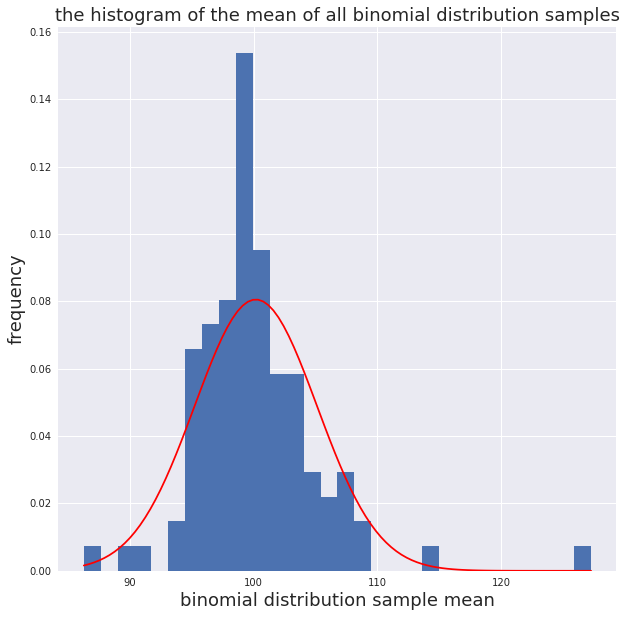

In [14]:
allmeans_binom = list(md['binom']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binom,bins=30,normed=True)
pl.xlabel('binomial distribution sample mean', fontsize = 18)
pl.ylabel('frequency', fontsize = 18)
pl.title('the histogram of the mean of all binomial distribution samples', fontsize = 18)

# fit with gaussian distribution
xmin_binom, xmax_binom = min(allmeans_binom), max(allmeans_binom)
lnspc_binom = np.linspace(xmin_binom, xmax_binom, len(allmeans_binom))
m_binom, s_binom = stats.norm.fit(allmeans_binom) # get mean and standard deviation
pdf_g_binom = stats.norm.pdf(lnspc_binom, m_binom, s_binom) # now get theoretical values in our interval
pl.plot(lnspc_binom, pdf_g_binom, label="Gaussian", color='r')

## Figure 8: This is the histogram of the mean of all Binomial Distribution samples. It shows the distribution of the mean of all binomial distribution samples tends to a Gaussian

# V. Exponential distribution

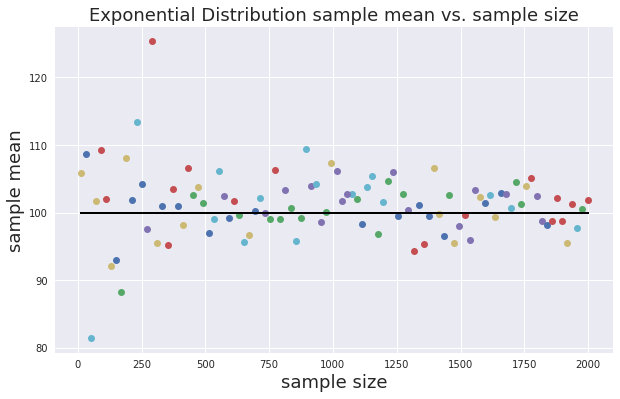

In [15]:
md['expo'] = {}
for n in mysize:
    md['expo'][n] = np.random.exponential(mymean, size=n)
    
md['expo']['means'] = {}
axexpo_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['expo']:
    if not type(nn) == str:
        md['expo']['means'][nn] = md['expo'][nn].mean()
        axexpo_mu_n.plot(nn, md['expo']['means'][nn], 'o')
        axexpo_mu_n.set_xlabel('sample size', fontsize=18)
        axexpo_mu_n.set_ylabel('sample mean', fontsize=18)
        axexpo_mu_n.set_title('Exponential Distribution sample mean vs. sample size', fontsize=18)
        axexpo_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 9: This is the plot of the $Exponential$ $Distribution$ sample mean (dependent var.) against the sample size N (independent var.). As the number of sample size increases, the sample mean (dependent var.) is approaching the theoretical value, which is given as $mymean=100$ at the beginning

## now the histogram of the mean of all exponential distribution samples

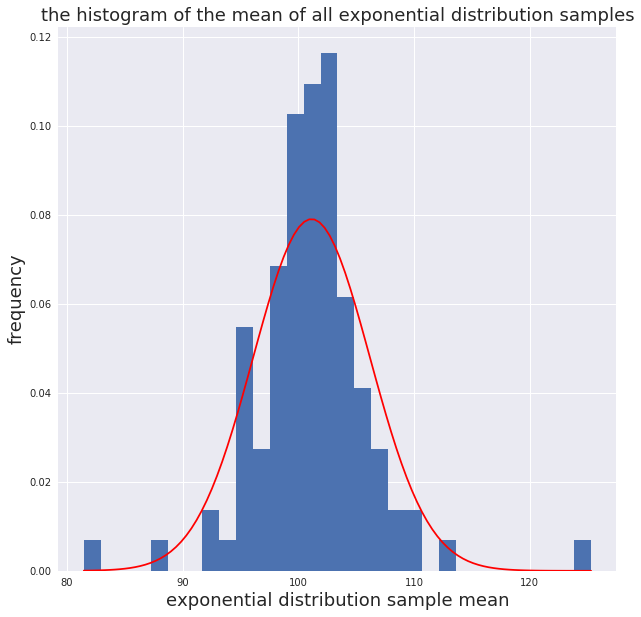

In [16]:
allmeans_expo = list(md['expo']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_expo,bins=30,normed=True)
pl.xlabel('exponential distribution sample mean', fontsize = 18)
pl.ylabel('frequency', fontsize = 18)
pl.title('the histogram of the mean of all exponential distribution samples', fontsize = 18)

# fit with gaussian distribution
xmin_expo, xmax_expo = min(allmeans_expo), max(allmeans_expo)
lnspc_expo = np.linspace(xmin_expo, xmax_expo, len(allmeans_expo))
m_expo, s_expo = stats.norm.fit(allmeans_expo) # get mean and standard deviation
pdf_g_expo = stats.norm.pdf(lnspc_expo, m_expo, s_expo) # now get theoretical values in our interval
pl.plot(lnspc_expo, pdf_g_expo, label="Gaussian", color='r')

## Figure 10: This is the histogram of the mean of all Exponential Distribution samples. It shows the distribution of the mean of all exponential distribution samples tends to a Gaussian